<a href="https://colab.research.google.com/github/Veerendravikas04/Nlp/blob/main/RNN_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample dataset
sentences = [
    'I love this movie, it is fantastic!',
    'This film is terrible, I hate it.',
    'What a great movie!',
    'The plot was boring and predictable.',
    'Amazing performance by the actors!',
    'I did not enjoy this movie at all.'
]

labels = [1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative

# Tokenize the sentences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad sequences to ensure uniform length
max_length = 10
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
y = np.array(labels)

In [ ]:
sequences

[[1, 7, 2, 3, 4, 5, 8],
 [2, 9, 5, 10, 1, 11, 4],
 [12, 13, 14, 3],
 [6, 15, 16, 17, 18, 19],
 [20, 21, 22, 6, 23],
 [1, 24, 25, 26, 2, 3, 27, 28]]

In [ ]:
sequences.count(10)

0

In [ ]:
# View the word index
word_index = tokenizer.word_index

# Print each word and its corresponding index
for word, index in word_index.items():
    print(word, "->", index)


i -> 1
this -> 2
movie -> 3
it -> 4
is -> 5
the -> 6
love -> 7
fantastic -> 8
film -> 9
terrible -> 10
hate -> 11
what -> 12
a -> 13
great -> 14
plot -> 15
was -> 16
boring -> 17
and -> 18
predictable -> 19
amazing -> 20
performance -> 21
by -> 22
actors -> 23
did -> 24
not -> 25
enjoy -> 26
at -> 27
all -> 28


In [ ]:
sequences

[[1, 7, 2, 3, 4, 5, 8],
 [2, 9, 5, 10, 1, 11, 4],
 [12, 13, 14, 3],
 [6, 15, 16, 17, 18, 19],
 [20, 21, 22, 6, 23],
 [1, 24, 25, 26, 2, 3, 27, 28]]

In [ ]:
X

array([[ 1,  7,  2,  3,  4,  5,  8,  0,  0,  0],
       [ 2,  9,  5, 10,  1, 11,  4,  0,  0,  0],
       [12, 13, 14,  3,  0,  0,  0,  0,  0,  0],
       [ 6, 15, 16, 17, 18, 19,  0,  0,  0,  0],
       [20, 21, 22,  6, 23,  0,  0,  0,  0,  0],
       [ 1, 24, 25, 26,  2,  3, 27, 28,  0,  0]], dtype=int32)

In [ ]:
y

array([1, 0, 1, 0, 1, 0])

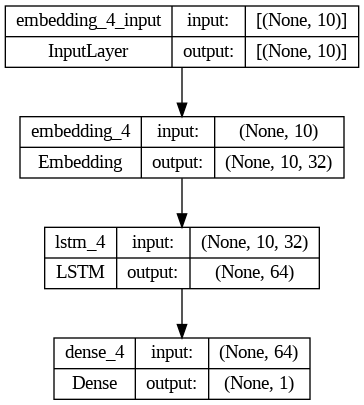

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import plot_model

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Plot the model structure
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 32)            320000    
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344897 (1.32 MB)
Trainable params: 344897 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
for layer in model.layers:
    print(layer.name, layer.output_shape)

embedding_4 (None, 10, 32)
lstm_4 (None, 64)
dense_4 (None, 1)


In [ ]:
# Train the model
model.fit(X, y, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6924 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6900 - accuracy: 0.8333
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6886 - accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 26ms/step - loss: 0.6871 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 0.6854 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6835 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6812 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6786 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6756 - accuracy: 1.0000


In [ ]:
# Predict new sentences
new_sentences = ['Vikas is a bad boy']
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_X = pad_sequences(new_sequences, maxlen=max_length, padding='post')

predictions = model.predict(new_X)
a=predictions.argmax()
if a==0:
  print("It is a negitive sentece")
else:
   print("It is a positive sentece")
print(a)

1/1 [==============================] - 0s 24ms/step
It is a negitive sentece
0
